In [1]:
import numpy as np
from collections import defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt 

In [2]:
k = 10
trials_by_an_agent = 1000
independant_trials = 2000

In [3]:
def a_trial():
    rewards = []
    true_means = np.random.randn(k)
    previous_attempts = defaultdict(list)
    for attempt in range(trials_by_an_agent):
        options = dict()
        for i in range(len(true_means)):
            if i in previous_attempts:
                options[i] = np.mean(previous_attempts[i])
            else:
                options[i] = 0
        max_value = max(options.values())
        best = np.random.choice([i for i, v in options.items() if v == max_value])
        reward = np.random.randn() * 1 + true_means[best]
        rewards.append(reward)
        previous_attempts[best].append(reward)
    return rewards

In [4]:
%%time

rewards = a_trial()

Wall time: 54 ms


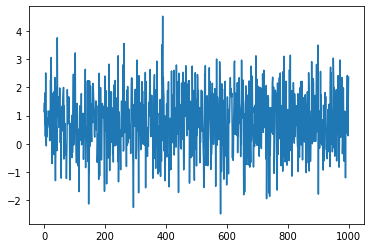

In [5]:
plt.plot(rewards);

In [6]:
rewards = []

for experiments in tqdm(range(independant_trials)):
    rewards.append(a_trial())

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [02:05<00:00, 15.96it/s]


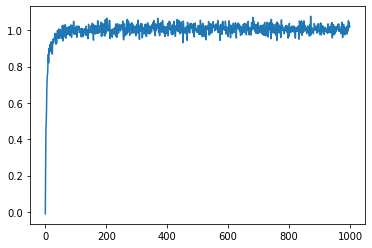

In [7]:
plt.plot(np.array(rewards).mean(axis=0));

In [8]:
np.mean(rewards), np.std(rewards)

(0.9982958569260535, 1.1672410733498177)

In [9]:
epsilon = 0.1

def b_trial():
    rewards = []
    true_means = np.random.randn(k)    
    previous_attempts = defaultdict(list)
    for attempt in range(trials_by_an_agent):
        if np.random.rand() < epsilon:
            best = np.random.randint(len(true_means))  # a random instead of best
        else:
            options = dict()
            for i in range(len(true_means)):
                if i in previous_attempts:
                    options[i] = np.mean(previous_attempts[i])
                else:
                    options[i] = 0
            max_value = max(options.values())
            best = np.random.choice([i for i, v in options.items() if v == max_value])
        reward = np.random.randn() * 1 + true_means[best]
        previous_attempts[best].append(reward)
        rewards.append(reward)
    return rewards

In [10]:
%%time

reward = b_trial()

Wall time: 89.6 ms


In [11]:
rewards_b = []

for experiments in tqdm(range(independant_trials)):
    rewards_b.append(b_trial())

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [03:06<00:00, 10.72it/s]


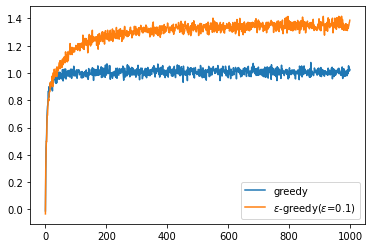

In [15]:
plt.plot(np.array(rewards).mean(axis=0), label='greedy');
plt.plot(np.array(rewards_b).mean(axis=0), label='$\epsilon$-greedy($\epsilon$=0.1)')
plt.legend();

In [13]:
np.mean(rewards_b), np.std(rewards_b)

(1.2881594761253532, 1.2786474525330904)